In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IN cv2 color channel are 'BGR' NOT 'RBG'
img = cv2.imread('dp.jpg',cv2.IMREAD_GRAYSCALE)


The other option that we have are (people also use numbers)
* IMREAD_COLOR - 1
* IMREAD_UNCHANGED = -1
* IMREAD_GRAYSCALE = 0

In [5]:
# Showing Image with opencv buildin function
cv2.imshow('image',img)
cv2.waitKey(0) #wait for any key to be pressed
cv2.destroyAllWindows()

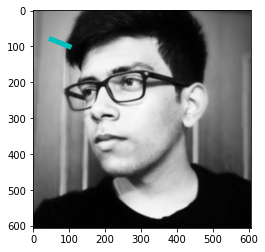

In [4]:
plt.imshow(img,cmap = 'gray',interpolation='bicubic')
plt.plot([50,100],[80,100],'c',linewidth=5)
plt.show()

In [ ]:
# And we can write image with
cv2.imwrite('.png',img)

In [ ]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))

while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow("frame1",gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
    

In [4]:
# Part 3
img = cv2.imread("dp.jpg",cv2.IMREAD_COLOR)
cv2.line(img,(0,0),(150,150),(255,255,255),15) 
#(input,starting_point,ending_point,(color_code),line_width)
#BGR
#blue = (255,0,0)
#green = (0,255,0)
#red = (0,0,255)
#black= (0,0,0)
#white= (255,255,255
cv2.rectangle(img,(15,25),(200,15),(0,255,0),5)
#                   _topleft,bottomright_
# negative linewidth will fill in the shape
cv2.circle(img,(499,85),89,(0,0,255),-1)
pts  = np.array([[10,29],[232,23],[443,12],[53,421]],np.int32)
cv2.polylines(img,[pts],True,(0,255,255),5)
#                     True:whether we want to close the shape
font=cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,'OpenCv pUTS!',(0,130),font,1,(200,255,255),2,cv2.LINE_AA)
#(img,text,loc,font,size,color,thickness,)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##drawing rectangle



In [5]:
pts  = np.array([[10,29],[232,23],[443,12],[53,421]],np.int32)
pts.shape
#pts.reshape((-1,1,2)).shape

(4, 2)

In [6]:
img = cv2.imread('dp.jpg',cv2.IMREAD_COLOR)
px = img[55,55]
print(px)



[155 163 163]


In [7]:
# Now we can even change the value
img[55,55] = [255,255,255]
px = img[55,55]
print(px)

[255 255 255]


In [8]:
#ROI - REGION OF IMAGE
img[50:240,50:240] = [255,255,255]
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#copying_and_pasting the image
face = img[93:422,121:372]
img[0:329,0:251] = face

In [11]:
#Image arithmatic
img1 = cv2.imread('3D-Matplotlib.png')
#img2 = cv2.imread('mainsvmimage.png')
img2 = cv2.imread('mainlogo.png')

#img_sum = img1+img2
#img_sum = cv2.add(img1,img2)
#weighted = cv2.addWeighted(img1,0.6,img2,0.4,0)

#cv2.imshow('figure',weighted)
#print(img2)
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img2gray,220,255,cv2.THRESH_BINARY_INV)
# SO here if any pixel is greater than 220 then it is coverted to 255 and
#if it is below 220 then converted to black than it inverses it.

mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask=mask)

dst = cv2.add(img1_bg,img2_fg)

img1[0:rows,0:cols] = dst

cv2.resize()





#cv2.waitKey(0)
#cv2.destroyAllWindows()




None


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Thresholding

img1 = cv2.imread('bookpage.jpg',cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

retval, threshold = cv2.threshold(img,12,255,cv2.THRESH_BINARY)

################
guass = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY,115,1)

retval2 , otsu = cv2.threshold(img1,10,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
# color filtering


cap = cv2.VideoCapture(0) ## 0 first webcam

while True:
    _, frame = cap.read()
    #hue saturation value
    # IN HSV all the values are independent of each other
    # unlike BGR.
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_orange = np.array([0,0,0])
    upper_orange = np.array([255,255,255])
    ## where there is white 1(if its in range and 0 otherwise) we
    #will show that color in mask.
    
    mask = cv2.inRange(hsv,lower_orange,upper_orange)
    
    res= cv2.bitwise_and(frame,frame,mask=mask)
    cv2.imshow("frame",res)
    cv2.imshow("mask",mask)
    cv2.imshow("frame",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    
    

cv2.destroyAllWindows()
cap.release()

    